 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_return = pd.read_csv("Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_return.sort_index(inplace=True)
whale_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_return.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_return.dropna(inplace=True)
whale_return.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_return = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_return.sort_index(inplace=True)
algo_return

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_return.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_return.dropna(inplace=True)
algo_return.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_return = pd.read_csv("Resources/sp500_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_return.sort_index(inplace=True)
sp500_return

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
sp500_return.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

### Source: https://pbpython.com/pandas_dtypes.html

def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')

    return float(new_val)

In [11]:
sp500_return["Close"] = sp500_return['Close'].apply(convert_currency)
sp500_return

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns
sp500_return["Return"] = sp500_return['Close'].pct_change()
sp500_return

,Close,Return
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [13]:
# Drop nulls
sp500_return.dropna(inplace=True)
sp500_return

,Close,Return
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return.rename(columns={"Close": "CloseSP500"}, inplace=True)
sp500_return

,CloseSP500,Return
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [15]:
whale_return.shape

(1059, 4)

In [16]:
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [17]:
whale_return.tail(15)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-10,0.009808,0.008366,0.002912,0.005269
2019-04-11,0.003406,-0.003959,-0.000637,-0.000496
2019-04-12,0.005663,-0.001165,0.004217,0.007316
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001448,0.001222,0.000582,0.001916
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-23,0.007167,0.003485,0.006472,0.013278


In [18]:
algo_return.shape

(1235, 2)

In [19]:
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [20]:
algo_return.tail(10)

,Algo 1,Algo 2
Date,,
2019-04-17,-0.010301,-0.005228
2019-04-18,-0.000588,-0.001229
2019-04-22,0.000677,-0.001936
2019-04-23,0.004969,0.009622
2019-04-24,0.001095,0.000399
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570


In [21]:
sp500_return.shape

(1648, 2)

In [22]:
sp500_return.head()

,CloseSP500,Return
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457


In [23]:
sp500_return.tail()

,CloseSP500,Return
Date,,
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579
2019-04-22,2907.97,0.001012
2019-04-23,2933.68,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined = pd.concat([whale_return, algo_return, sp500_return], axis="columns")
# combined.dropna(inplace=True)
combined.shape

(1664, 8)

In [25]:
combined.dropna(inplace=True)
combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,CloseSP500,Return
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.003944
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [26]:
combined.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'CloseSP500', 'Return'],
      dtype='object')

In [27]:
combined.rename(columns={"Return": "ReturnSP500"}, inplace=True)
combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,CloseSP500,ReturnSP500
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43,0.003944
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03,0.001579


<AxesSubplot:xlabel='Date'>

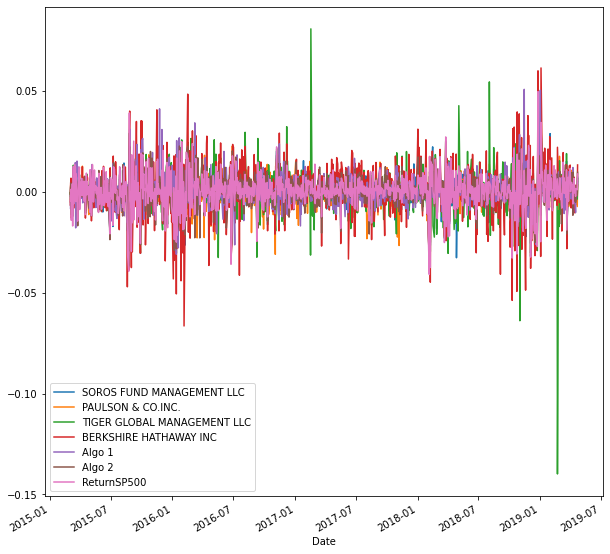

In [28]:
# Plot daily returns of all portfolios
combined[["SOROS FUND MANAGEMENT LLC",
          "PAULSON & CO.INC. ",
          "TIGER GLOBAL MANAGEMENT LLC",
          "BERKSHIRE HATHAWAY INC",
          "Algo 1",
          "Algo 2",
          "ReturnSP500"]].plot(figsize=(10,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

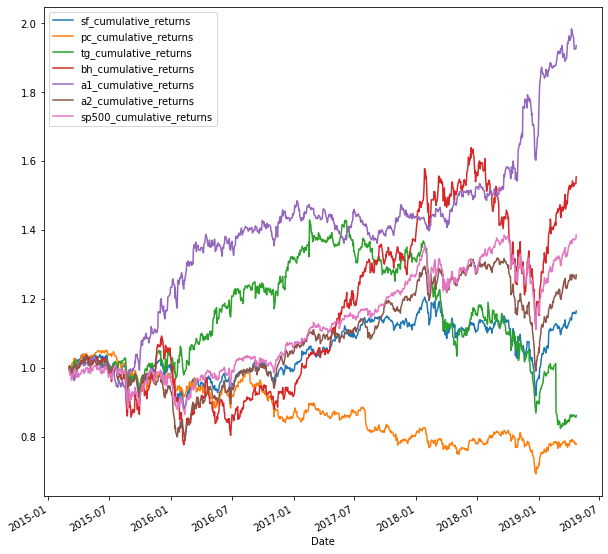

In [29]:
# Calculate cumulative returns of all portfolios
combined["sf_cumulative_returns"] = (1 + combined["SOROS FUND MANAGEMENT LLC"]).cumprod()
combined["pc_cumulative_returns"] = (1 + combined["PAULSON & CO.INC. "]).cumprod()
combined["tg_cumulative_returns"] = (1 + combined["TIGER GLOBAL MANAGEMENT LLC"]).cumprod()
combined["bh_cumulative_returns"] = (1 + combined["BERKSHIRE HATHAWAY INC"]).cumprod()
combined["a1_cumulative_returns"] = (1 + combined["Algo 1"]).cumprod()
combined["a2_cumulative_returns"] = (1 + combined["Algo 2"]).cumprod()
combined["sp500_cumulative_returns"] = (1 + combined["ReturnSP500"]).cumprod()

# Plot cumulative returns
combined[["sf_cumulative_returns",
         "pc_cumulative_returns",
         "tg_cumulative_returns",
         "bh_cumulative_returns",
         "a1_cumulative_returns",
         "a2_cumulative_returns",
         "sp500_cumulative_returns"]].plot(figsize=(10,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

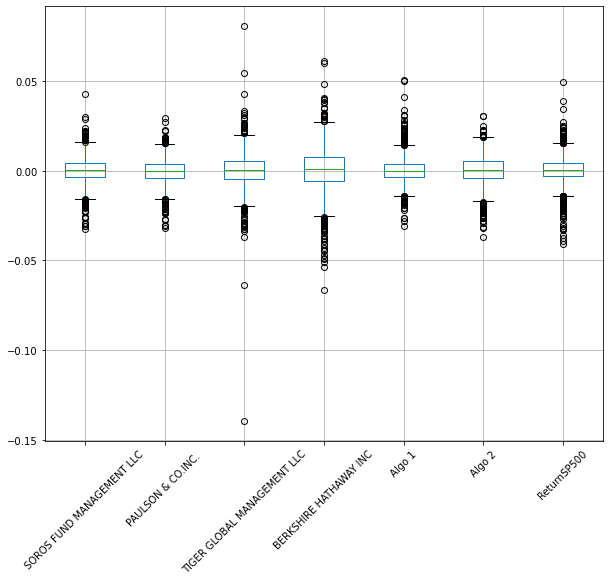

In [30]:
# Box plot to visually show risk
cols_to_plot = []
combined.boxplot(["SOROS FUND MANAGEMENT LLC",
          "PAULSON & CO.INC. ",
          "TIGER GLOBAL MANAGEMENT LLC",
          "BERKSHIRE HATHAWAY INC",
          "Algo 1",
          "Algo 2",
          "ReturnSP500"], figsize=(10,8), rot=45)

### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios
# Calculate the annualized standard deviation (252 trading days)
sf_std = combined["sf_cumulative_returns"].std()
pc_std = combined["pc_cumulative_returns"].std()
tg_std = combined["tg_cumulative_returns"].std()
bh_std = combined["bh_cumulative_returns"].std()
a1_std = combined["a1_cumulative_returns"].std()
a2_std = combined["a2_cumulative_returns"].std()
sp500_std = combined["sp500_cumulative_returns"].std()

print(f"SF Returns std {sf_std}")
print(f"PC Returns std {pc_std}")
print(f"TG Returns std {tg_std}")
print(f"BH Returns std {bh_std}")
print(f"A1 Returns std {a1_std}")
print(f"A2 Returns std {a2_std}\n")
print(f"SP500 Returns std {sp500_std}\n")

SF Returns std 0.0732381791816174
PC Returns std 0.08845503752573346
TG Returns std 0.14984442474431858
BH Returns std 0.24157462880056535
A1 Returns std 0.23227714752452805
A2 Returns std 0.13170033061807573

SP500 Returns std 0.14444769967610394



### Determine which portfolios are riskier than the S&P 500

In [32]:
# Calculate  the daily standard deviation of S&P 500
print(f"Daily Standard Deviation of SP500 is {sp500_std}\n")

# Determine which portfolios are riskier than the S&P 500
print(f"SF Returns std {sf_std}")
print(f"PC Returns std {pc_std}")
print(f"TG Returns std {tg_std}")
print(f"BH Returns std {bh_std}")
print(f"A1 Returns std {a1_std}")
print(f"A2 Returns std {a2_std}\n")

print("SF,PC and A2 have lower volatility than the SP500")

Daily Standard Deviation of SP500 is 0.14444769967610394

SF Returns std 0.0732381791816174
PC Returns std 0.08845503752573346
TG Returns std 0.14984442474431858
BH Returns std 0.24157462880056535
A1 Returns std 0.23227714752452805
A2 Returns std 0.13170033061807573

SF,PC and A2 have lower volatility than the SP500


### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
sf_volatility = combined["sf_cumulative_returns"].std() * np.sqrt(252)
pc_volatility = combined["pc_cumulative_returns"].std() * np.sqrt(252)
tg_volatility = combined["tg_cumulative_returns"].std() * np.sqrt(252)
bh_volatility = combined["bh_cumulative_returns"].std() * np.sqrt(252)
a1_volatility = combined["a1_cumulative_returns"].std() * np.sqrt(252)
a2_volatility = combined["a2_cumulative_returns"].std() * np.sqrt(252)
sp500_volatility = combined["sp500_cumulative_returns"].std() * np.sqrt(252)

print(f"SF Volatility {sf_volatility}")
print(f"PC Volatility {pc_volatility}")
print(f"TG Volatility {tg_volatility}")
print(f"BH Volatility {bh_volatility}")
print(f"A1 Volatility {a1_volatility}")
print(f"A2 Volatility {a2_volatility}")
print(f"SP500 Volatility {sp500_volatility}")

SF Volatility 1.162620051538486
PC Volatility 1.4041801890238612
TG Volatility 2.378706499338002
BH Volatility 3.8348783452142254
A1 Volatility 3.6872854055601807
A2 Volatility 2.0906779344024837
SP500 Volatility 2.2930361447898973


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

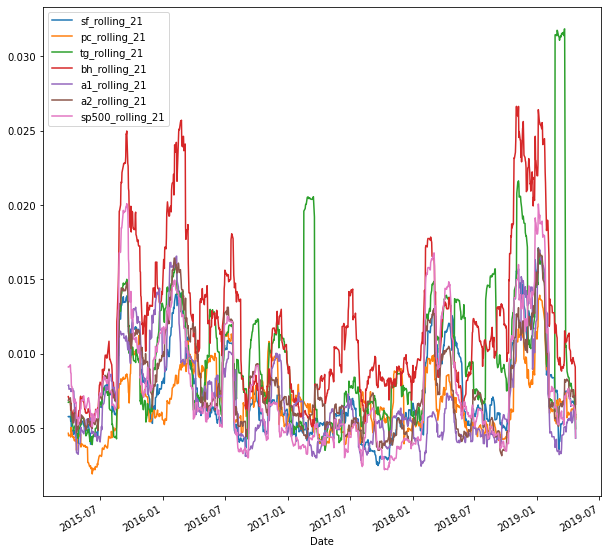

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined["sf_rolling_21"] = combined["SOROS FUND MANAGEMENT LLC"].rolling(21).std()
combined["pc_rolling_21"] = combined["PAULSON & CO.INC. "].rolling(21).std()
combined["tg_rolling_21"] = combined["TIGER GLOBAL MANAGEMENT LLC"].rolling(21).std()
combined["bh_rolling_21"] = combined["BERKSHIRE HATHAWAY INC"].rolling(21).std()
combined["a1_rolling_21"] = combined["Algo 1"].rolling(21).std()
combined["a2_rolling_21"] = combined["Algo 2"].rolling(21).std()
combined["sp500_rolling_21"] = combined["ReturnSP500"].rolling(21).std()

# Plot the rolling standard deviation
combined[["sf_rolling_21",
         "pc_rolling_21",
         "tg_rolling_21",
         "bh_rolling_21",
         "a1_rolling_21",
         "a2_rolling_21",
         "sp500_rolling_21"]].plot(figsize=(10,10))

### Calculate and plot the correlation

In [35]:
# Calculate the correlation
correlation = combined[["sf_rolling_21",
         "pc_rolling_21",
         "tg_rolling_21",
         "bh_rolling_21",
         "a1_rolling_21",
         "a2_rolling_21",
         "sp500_rolling_21"]].corr()

# Display de correlation matrix
correlation

,sf_rolling_21,pc_rolling_21,tg_rolling_21,bh_rolling_21,a1_rolling_21,a2_rolling_21,sp500_rolling_21
sf_rolling_21,1.000000,0.664590,0.451969,0.859187,0.721356,0.872922,0.911914
pc_rolling_21,0.664590,1.000000,0.407927,0.631215,0.585584,0.688595,0.597760
tg_rolling_21,0.451969,0.407927,1.000000,0.413311,0.265667,0.359691,0.414108
bh_rolling_21,0.859187,0.631215,0.413311,1.000000,0.794022,0.824877,0.812766
a1_rolling_21,0.721356,0.585584,0.265667,0.794022,1.000000,0.760948,0.699671
a2_rolling_21,0.872922,0.688595,0.359691,0.824877,0.760948,1.000000,0.901190
sp500_rolling_21,0.911914,0.597760,0.414108,0.812766,0.699671,0.901190,1.000000


<AxesSubplot:>

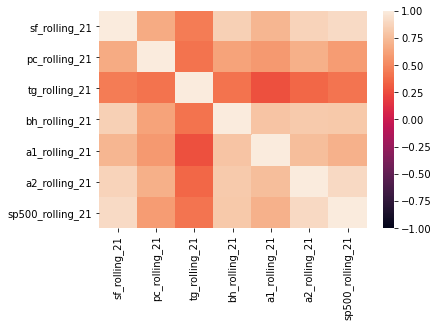

In [36]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

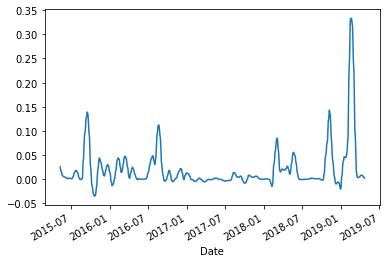

In [37]:
# Calculate covariance of a single portfolio
algo1_covariance = combined["a1_rolling_21"].rolling(window=30).cov(combined["sp500_rolling_21"])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = combined["sp500_rolling_21"].rolling(window=30).var()

# # Calculate variance of S&P 500
variance = combined["ReturnSP500"].var()
# # Computing beta
algo1_beta = algo1_covariance / variance

# # Plot beta trend
algo1_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

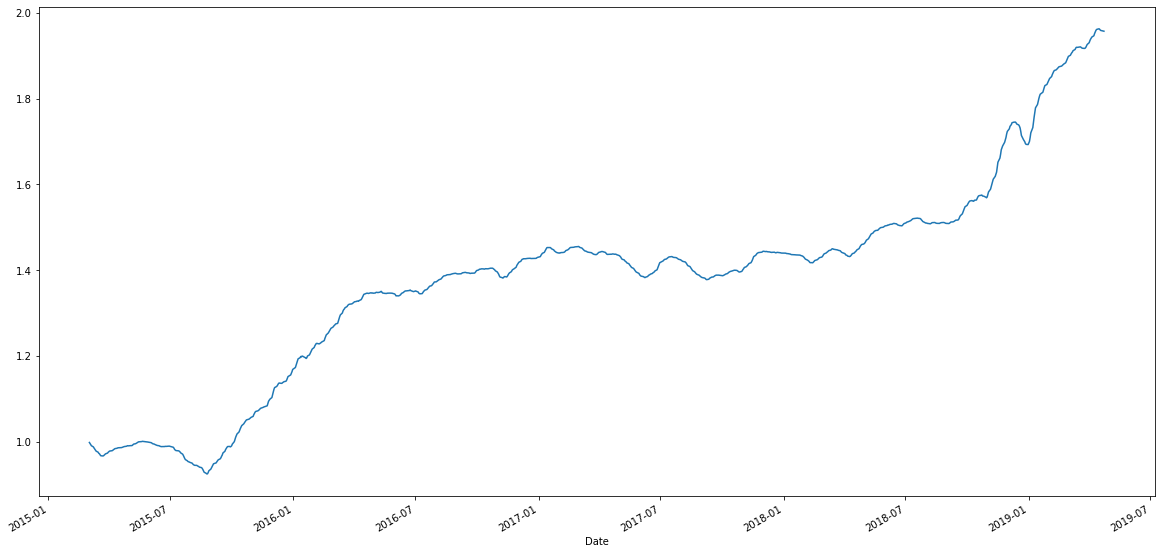

In [38]:
# Use `ewm` to calculate the rolling window
ewm = combined["Algo 1"].ewm(span = 21,adjust = False).mean()
(1+ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:title={'center':'Rolling 30-Day Beta of AMZN'}, xlabel='Date'>

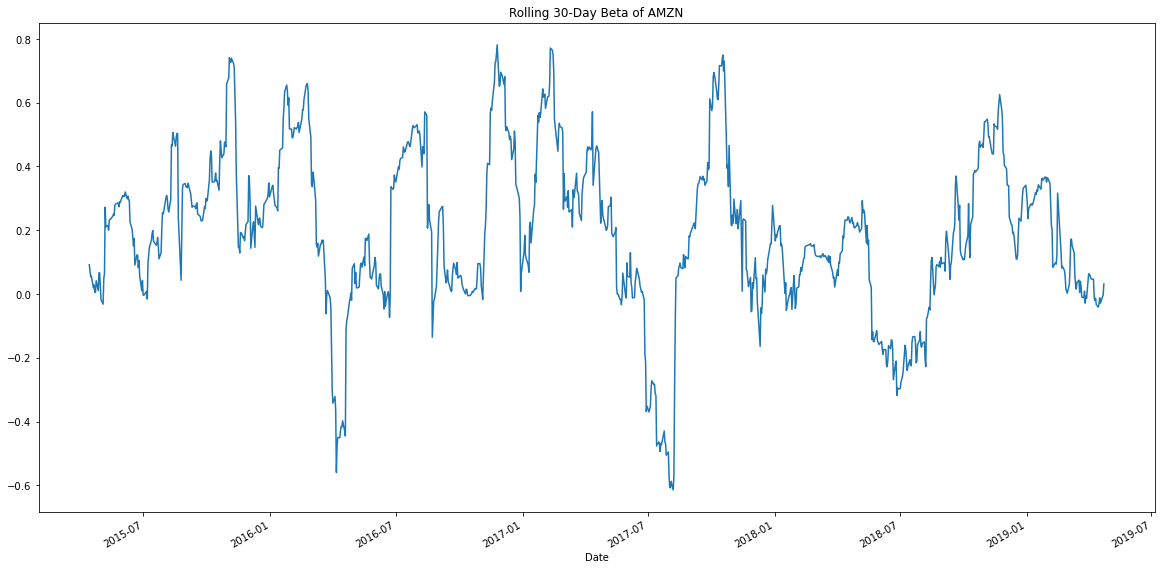

In [39]:
# Annualized Sharpe Ratios
rolling_covariance = combined["Algo 1"].rolling(window=30).cov(combined["ReturnSP500"])
rolling_variance = combined["ReturnSP500"].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of AMZN')

<AxesSubplot:>

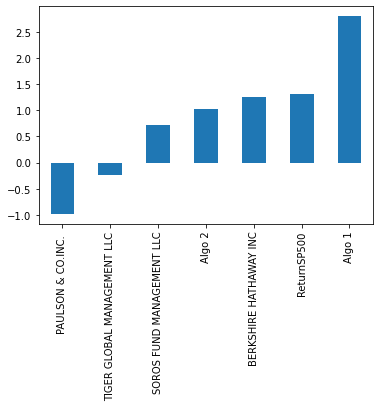

In [40]:
# Visualize the sharpe ratios as a bar plot
to_sharpe = combined[["SOROS FUND MANAGEMENT LLC",
          "PAULSON & CO.INC. ",
          "TIGER GLOBAL MANAGEMENT LLC",
          "BERKSHIRE HATHAWAY INC",
          "Algo 1",
          "Algo 2",
          "ReturnSP500"]]

number_trading_days = to_sharpe.count()
sharpe_ratios = ((to_sharpe.mean() * number_trading_days) / (to_sharpe.std() * np.sqrt(number_trading_days)))
sharpe_ratios.sort_values(inplace=True, ascending=True)
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes, Algorithmic strategy 1 seems to outperform SP500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [41]:
# Reading data from 1st stock
goog_df = pd.read_csv("Resources/goog_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True, header=0, names=["symbol","Trade DATE","goog_close"])
goog_df

,symbol,goog_close
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [42]:
# Reading data from 2nd stock
aapl_df = pd.read_csv("Resources/aapl_historical.csv", header=0, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True, names=["symbol","Trade DATE","aapl_close"])
aapl_df

,symbol,aapl_close
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [43]:
# Reading data from 3rd stock
cost_df = pd.read_csv("Resources/cost_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True, header=0,names=["symbol","Trade DATE","cost_close"])
cost_df

,symbol,cost_close
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [44]:
# Combine all stocks in a single DataFrame
combined2 = pd.concat([goog_df,aapl_df,cost_df], axis="columns")
combined2

,symbol,goog_close,symbol,aapl_close,symbol,cost_close
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48


In [45]:
# Reset Date index
combined2.reset_index(inplace=True)
combined2.sort_index(inplace=True)
combined2

,Trade DATE,symbol,goog_close,symbol,aapl_close,symbol,cost_close
0,2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
1,2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2,2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
3,2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
4,2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...,...
245,2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
246,2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
247,2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
248,2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88


In [46]:
# Reorganize portfolio data by having a column per symbol
portfolio = combined2[["Trade DATE","goog_close","aapl_close","cost_close"]]
portfolio.set_index("Trade DATE", inplace=True)
portfolio.sort_index(inplace=True)
portfolio

<ipython-input-46-76f5dcbdd83e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio.sort_index(inplace=True)


,goog_close,aapl_close,cost_close
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [47]:
# Calculate daily returns
portfolio = portfolio.pct_change()
portfolio

# Drop NAs
portfolio.dropna(inplace=True)

# Display sample data
portfolio.tail()

,goog_close,aapl_close,cost_close
Trade DATE,,,
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583
2019-05-08,-0.006669,0.000197,0.004830
2019-05-09,-0.003335,-0.010744,0.008826


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Trade DATE'>

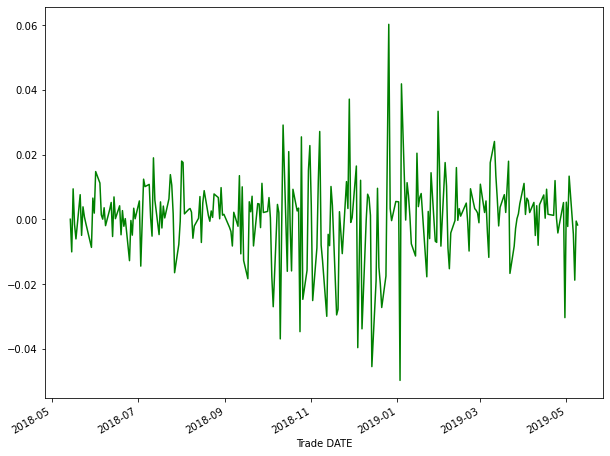

In [48]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
initial_investment = 10000

portfolio_returns = portfolio.dot(weights)
portfolio_returns.plot(figsize=(10,8), color="green")

In [49]:
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns.rename("portfolio_return", inplace=True)
all_df = pd.concat([portfolio,portfolio_returns], axis="columns")
all_df

,goog_close,aapl_close,cost_close,portfolio_return
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064
2018-05-16,0.002354,0.009333,0.016523,0.009403
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061
...,...,...,...,...
2019-05-03,0.019602,0.012431,0.007953,0.013329
2019-05-06,0.003366,-0.015443,-0.001594,-0.004557
2019-05-07,-0.012855,-0.026957,-0.016583,-0.018798


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df.dropna(inplace=True)
all_df.sort_index(inplace=True)
all_df

,goog_close,aapl_close,cost_close,portfolio_return
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064
2018-05-16,0.002354,0.009333,0.016523,0.009403
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061
...,...,...,...,...
2019-05-03,0.019602,0.012431,0.007953,0.013329
2019-05-06,0.003366,-0.015443,-0.001594,-0.004557
2019-05-07,-0.012855,-0.026957,-0.016583,-0.018798


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
goog_annual_std = all_df["goog_close"].std() * np.sqrt(252)
aapl_annual_std = all_df["aapl_close"].std() * np.sqrt(252)
cost_annual_std = all_df["cost_close"].std() * np.sqrt(252)
all_annual_std = all_df["portfolio_return"].std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

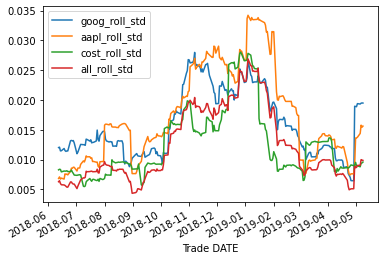

In [53]:
# Calculate rolling standard deviation
all_df["goog_roll_std"] = all_df["goog_close"].rolling(21).std()
all_df["aapl_roll_std"] = all_df["aapl_close"].rolling(21).std()
all_df["cost_roll_std"] = all_df["cost_close"].rolling(21).std()
all_df["all_roll_std"] = all_df["portfolio_return"].rolling(21).std()
# Plot rolling standard deviation
all_df[["goog_roll_std","aapl_roll_std","cost_roll_std","all_roll_std"]].plot()

### Calculate and plot the correlation

<AxesSubplot:>

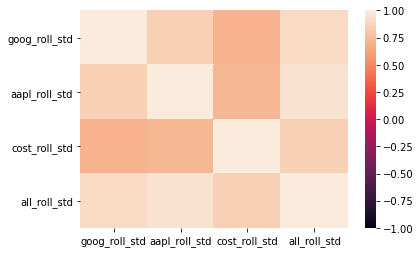

In [54]:
# Calculate and plot the correlation
roll_window_df = all_df[["goog_roll_std","aapl_roll_std","cost_roll_std","all_roll_std"]]
roll_window_df = roll_window_df.corr()
roll_window_df

sns.heatmap(roll_window_df, vmin=-1, vmax=1)

In [55]:
rolling_variance = combined["sp500_rolling_21"].rolling(window=30).var()
rolling_variance

Date
2015-03-03             NaN
2015-03-04             NaN
2015-03-05             NaN
2015-03-06             NaN
2015-03-09             NaN
                  ...     
2019-04-16    5.984933e-07
2019-04-17    5.554580e-07
2019-04-18    5.281357e-07
2019-04-22    5.063837e-07
2019-04-23    6.648204e-07
Name: sp500_rolling_21, Length: 1043, dtype: float64

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

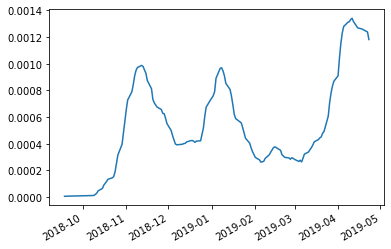

In [57]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
rolling_variance_60 = combined["ReturnSP500"].rolling(window=60).var() ### above says 60

all_df["goog_roll60_std"] = all_df["goog_close"].rolling(60).std()

goog_covariance = all_df["goog_roll60_std"].rolling(window=30).cov(rolling_variance_60)
goog_covariance.dropna(inplace=True)

# Calculate variance of S&P 500
variance = combined["ReturnSP500"].var()
variance
# Computing beta
goog_beta = goog_covariance / variance

# Plot beta trend
goog_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
all_df

,goog_close,aapl_close,cost_close,portfolio_return,goog_roll_std,aapl_roll_std,cost_roll_std,all_roll_std,goog_roll60_std
Trade DATE,,,,,,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015,NaN,NaN,NaN,NaN,NaN
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064,NaN,NaN,NaN,NaN,NaN
2018-05-16,0.002354,0.009333,0.016523,0.009403,NaN,NaN,NaN,NaN,NaN
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595,NaN,NaN,NaN,NaN,NaN
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-05-03,0.019602,0.012431,0.007953,0.013329,0.019387,0.013750,0.008958,0.009025,0.014459
2019-05-06,0.003366,-0.015443,-0.001594,-0.004557,0.019320,0.014384,0.008801,0.009049,0.014310
2019-05-07,-0.012855,-0.026957,-0.016583,-0.018798,0.019464,0.015773,0.009391,0.009995,0.014416


In [59]:
# Calculate Annualzied Sharpe Ratios
to_sharpe = all_df[["goog_close","aapl_close","cost_close","portfolio_return"]]

number_trading_days = to_sharpe.count()
sharpe_ratios = ((to_sharpe.mean() * 252) / (to_sharpe.std() * np.sqrt(252)))
sharpe_ratios.sort_values(inplace=True, ascending=True)

<AxesSubplot:>

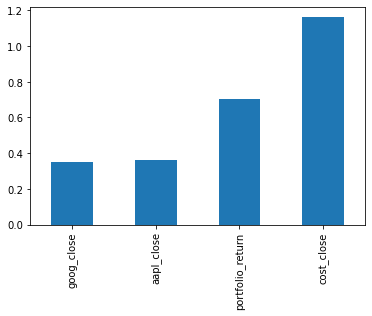

In [60]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

The portfolio did better than the SP500 as I am comparing to SP500 and obtaining positive values